## American Sign Language Dataset

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

In [7]:
x_train = train_df.values
x_valid = valid_df.values

In [8]:
x_train.shape

(27455, 784)

In [9]:
y_train.shape

(27455,)

In [10]:
x_valid.shape

(7172, 784)

In [11]:
y_valid.shape

(7172,)

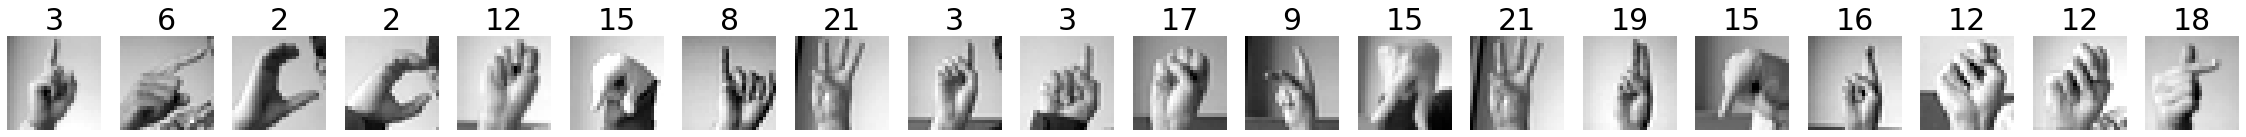

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [13]:
x_train.min()

0

In [14]:
x_train.max()

255

In [15]:
# TODO: Normalize x_train and x_valid.
x_train = x_train / 255
x_valid = x_valid / 255 

In [16]:
import tensorflow.keras as keras
num_classes = 24

In [17]:
# TODO: Categorically encode y_train and y_valid.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# TODO: build a model following the guidelines above.
model = Sequential()

model.add(Dense(units = 512, activation = 'relu', input_shape = (784,)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = num_classes, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 24)                12312     
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# TODO: Train the model for 20 epochs.
h = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 10s 348us/sample - loss: 1.9438 - accuracy: 0.3875 - val_loss: 1.3270 - val_accuracy: 0.5547
Epoch 2/20
27455/27455 [==============================] - 8s 302us/sample - loss: 0.9443 - accuracy: 0.6806 - val_loss: 1.0249 - val_accuracy: 0.6636
Epoch 3/20
27455/27455 [==============================] - 8s 301us/sample - loss: 0.5715 - accuracy: 0.8106 - val_loss: 0.9823 - val_accuracy: 0.6939
Epoch 4/20
27455/27455 [==============================] - 8s 294us/sample - loss: 0.3825 - accuracy: 0.8764 - val_loss: 0.8351 - val_accuracy: 0.7638
Epoch 5/20
27455/27455 [==============================] - 8s 295us/sample - loss: 0.2996 - accuracy: 0.9094 - val_loss: 1.3522 - val_accuracy: 0.7154
Epoch 6/20
27455/27455 [==============================] - 8s 295us/sample - loss: 0.2493 - accuracy: 0.9319 - val_loss: 0.8884 - val_accuracy: 0.8019
Epoch 7/20
27455/27455 [==========================

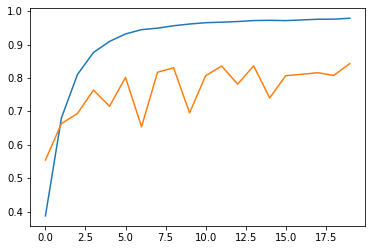

In [23]:
plt.plot(h.epoch, h.history['accuracy'])
plt.plot(h.epoch, h.history['val_accuracy'])

### This means overfitting

In [24]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}